In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Literal

In [2]:
PATH = "fig_data/is_benchmark"
AllowedDatasets = Literal["Ni_superalloy_SEM", "T_cell_TEM", "Cu_ore_RLM"]
dataset: tuple[AllowedDatasets, ...] = ("Ni_superalloy_SEM", "T_cell_TEM", "Cu_ore_RLM")
chosen_datasets: tuple[AllowedDatasets, ...] = ("Ni_superalloy_SEM", "T_cell_TEM", "Cu_ore_RLM")

data_dict: dict[AllowedDatasets, dict] = {k: {} for k in chosen_datasets}

In [3]:
def load_miou_file_modify_dict(path: str, dataset: AllowedDatasets, input_dict: dict[AllowedDatasets, dict]) -> dict[AllowedDatasets, dict]:
    structured_arr = np.load(path, allow_pickle=True)
    for featureset in ('classical', 'deep'):
        key = f"{featureset}_miou"
        input_dict[dataset][key] = structured_arr.item().get(key)
        input_dict[dataset][f"{key}_std"] = structured_arr.item().get(f"{key}_std")
    return input_dict

def get_best(dataset: AllowedDatasets, input_dict: dict[AllowedDatasets, dict]):
    for featureset in ('classical', 'deep'):
        key = f"{featureset}_miou"
        best_miou = np.amax(input_dict[dataset][key])
        best_miou_idx = np.argmax(best_miou)
        std = input_dict[dataset][f"{key}_std"][best_miou_idx]
        print(f"{dataset} {featureset}: {best_miou:.4f} +/- {std:.4f} ")

In [4]:
for dataset in chosen_datasets:
    load_miou_file_modify_dict(f"{PATH}/miou_results/{dataset}.npy", dataset, data_dict)

In [5]:
for k,_ in data_dict.items():
    get_best(k, data_dict)

Ni_superalloy_SEM classical: 0.7090 +/- 0.1350 
Ni_superalloy_SEM deep: 0.7713 +/- 0.0730 
T_cell_TEM classical: 0.5772 +/- 0.1408 
T_cell_TEM deep: 0.8009 +/- 0.1490 
Cu_ore_RLM classical: 0.8743 +/- 0.0538 
Cu_ore_RLM deep: 0.8820 +/- 0.0338 


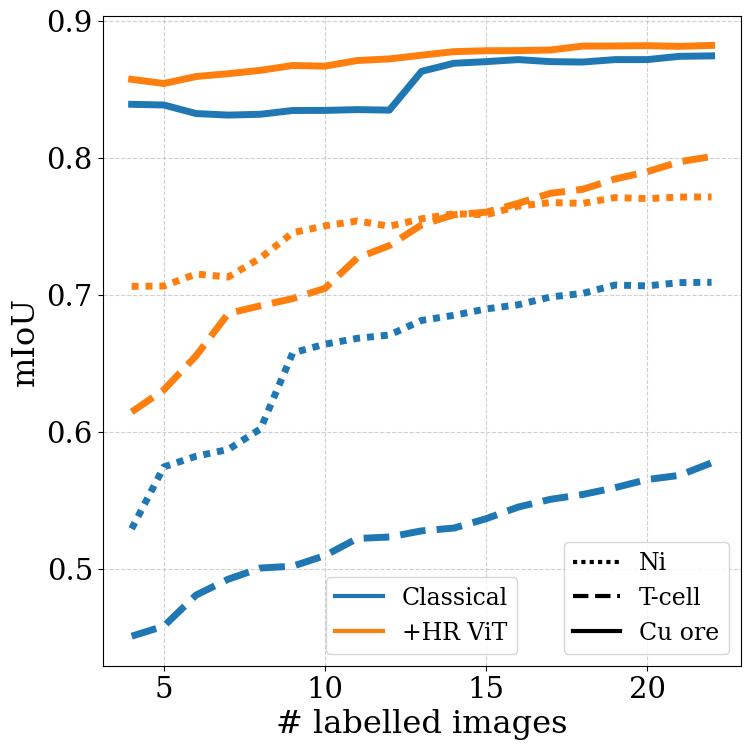

In [ ]:
%%capture

import matplotlib.lines as mlines

plt.rcParams["font.family"] = "serif"

TITLE_FS = 25
LABEL_FS = 23
TICK_FS = 21

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

# markers = ('.', '.', '.')
markers = ('.', '^', '*')
# linestyles = ('solid', 'solid', 'solid')
linestyles = ((0, (1, 1)), 'dashed', 'solid', )
colors = ('C0', 'C1', 'C2')

lines = []
dataset_titles = ["Ni", "T-cell", "Cu ore"]
for i in range(len(data_dict.items())):
    l = mlines.Line2D([], [], color=f'black', label=dataset_titles[i], lw=3, ls=linestyles[i])
    lines.append(l)


# Dummy lines for second legend (black, default and dashed linestyle)
line4 = mlines.Line2D([], [], color='C0', linestyle='-', label='Classical', lw=3)
line5 = mlines.Line2D([], [], color='C1', linestyle='-', label='+HR ViT', lw=3)

# lines.append(line4)
# lines.append(line5)

for i, (ds, vals) in enumerate(data_dict.items()):
    n_labels = [4 + i for i in range(0, len(vals['deep_miou']))]

    plt.plot(n_labels, vals['classical_miou'], marker=markers[0], lw=5, ms=0, color=colors[0], ls=linestyles[i])
    plt.plot(n_labels, vals['deep_miou'], marker=markers[0], lw=5, ms=0, color=colors[1], ls=linestyles[i])

plt.xlabel('# labelled images', fontsize=LABEL_FS)
plt.ylabel('mIoU', fontsize=LABEL_FS)
ax.tick_params(axis='both', labelsize=TICK_FS)

ax.grid(True, linestyle="--", alpha=0.6)
# plt.legend(fontsize=TICK_FS)


first_legend = ax.legend(handles=lines, loc='lower right', fontsize=TICK_FS-4)

# Add the second legend
second_legend = ax.legend(handles=[line4, line5], loc='lower center', fontsize=TICK_FS-4)

ax.add_artist(first_legend)

plt.tight_layout(pad=2.5)
plt.savefig('fig_out/miou_vs_n_labels.png', bbox_inches='tight')